In [ ]:

# importing libraries
import pandas as pd
import numpy as np
  
dataset_url = "https://raw.github.com/Sayan-Santra/Predict_Rainfall/main/austin_weather.csv"
#'https://raw.githubusercontent.com/Shakib1126/Rainfall-Prediction-using-Neural-Networks/master/austin_weather.csv'
#https://github.com/Sayan-Santra/Predict_Rainfall/blob/95029143fa5e390bee3425a38b4f178b36110271/austin_weather.csv
# read the data in a pandas dataframe
data = pd.read_csv(dataset_url)
  
# drop or delete the unnecessary columns in the data.

data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
  
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)
  
# save the data in a csv file
data.to_csv('austin_final.csv')

      Unnamed: 0  TempHighF  ...  WindGustMPH  PrecipitationSumInches
0              0         74  ...         31.0                    0.46
1              1         56  ...         25.0                    0.00
2              2         58  ...         12.0                    0.00
3              3         61  ...         20.0                    0.00
4              4         58  ...         16.0                    0.00
...          ...        ...  ...          ...                     ...
1314        1314        103  ...         21.0                    0.00
1315        1315        105  ...         20.0                    0.00
1316        1316        107  ...         17.0                    0.00
1317        1317        106  ...         20.0                    0.00
1318        1318         99  ...         20.0                    0.00

[1319 rows x 18 columns]
Epoch 1/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0396 - accuracy: 0.7692
Epoch 2/50
37/37 [====

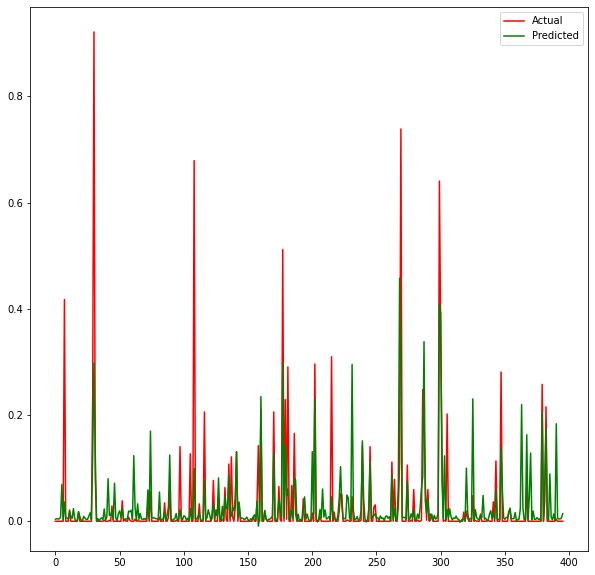

The precipitation in inches is  12.509869
The precipitation in Millimeters is  317.75066299438475


In [ ]:
  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

dataset =  pd.read_csv("austin_final.csv")
print(dataset)

X = dataset.drop(['PrecipitationSumInches'], axis = 1) 
  
# the output or the label. 
Y = dataset['PrecipitationSumInches'] 
# reshaping it into a 2-D vector 
Y = Y.values.reshape(-1, 1) 

sc= MinMaxScaler()
X= sc.fit_transform(X)
Y=sc.fit_transform(Y)

# x1= sc.inverse_transform(X)
# print(x1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# def build_regressor():
#     regressor = Sequential()
#     regressor.add(Dense(units=17, input_dim=17))
#     regressor.add(Dense(units=1))
#     regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
#     return regressor

def build_regressor():
    model = Sequential()
    model.add(Dense(128, input_dim=17, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return model

regressor = KerasRegressor(build_fn=build_regressor, batch_size=25,epochs=50)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

# acc_score = sklearn.metrics.accuracy_score(y_test, y_pred, normalize=False)
# print(acc_score)

# fig, ax = plt.subplots()
# ax.scatter(y_test, y_pred)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

plt.figure(figsize=(10, 10))
plt.plot(y_test, 'r-', label='Actual')
plt.plot(y_pred, 'g-', label='Predicted')
plt.legend()
plt.show()

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], 
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 
inp = inp.reshape(1, -1)
#inp = sc.fit_transform(inp)
output = regressor.predict(inp)
#output = sc.inverse_transform(output)
print("The precipitation in inches is ",abs(output))
print("The precipitation in Millimeters is ",abs(output*25.4))